# Projet Kaggle : Spaceship Titanic
Predict which passengers are transported to an alternate dimension https://www.kaggle.com/competitions/spaceship-titanic/overview

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

#### To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

#### Help save them and change history!

We want to predict if a passenger has been transported or not. For this purpose we are going to use 2 models : logistic regression and a random forest. Then compare between them.

## At first we are going to import those data and explore them.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
chemin = "train.csv"
data_train = pd.read_csv(chemin)
print('The size of my training data is ',data_train.shape)

chemin1 = "test.csv"
data_test = pd.read_csv(chemin1)
print('The size of my test data is ',data_test.shape)

The size of my training data is  (8693, 14)
The size of my test data is  (4277, 13)


### Let's have a look to the variables and first informations 

In [4]:
print("Variables of the dataset are :",data_train.columns,"\n")
print("Let's have a look of the dataset \n",data_train.head(),"\n")
print("Let's have a look to the type of the variables \n",data_train.info())

Variables of the dataset are : Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object') 

Let's have a look of the dataset 
   PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP   
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False  \
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name   
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy  \
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Al

The target variable is "Transported" wich is a boolean. Some variables are "object" but we can change it because of the context. We are going to see it later. We have 13 variables. 

In [5]:
for col in data_train.columns:
    nb_modalite = data_train[col].nunique()
    print(f" The variable '{col}' got {nb_modalite} values possible")

 The variable 'PassengerId' got 8693 values possible
 The variable 'HomePlanet' got 3 values possible
 The variable 'CryoSleep' got 2 values possible
 The variable 'Cabin' got 6560 values possible
 The variable 'Destination' got 3 values possible
 The variable 'Age' got 80 values possible
 The variable 'VIP' got 2 values possible
 The variable 'RoomService' got 1273 values possible
 The variable 'FoodCourt' got 1507 values possible
 The variable 'ShoppingMall' got 1115 values possible
 The variable 'Spa' got 1327 values possible
 The variable 'VRDeck' got 1306 values possible
 The variable 'Name' got 8473 values possible
 The variable 'Transported' got 2 values possible


In [6]:
nombre_doublons = data_train.duplicated().sum()

print(f'The total number of duplicatness : {nombre_doublons}')

The total number of duplicatness : 0


In [7]:
data_train.describe(include="all")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


### Missing Values

Nevertheless the dataset may got missing values to find a solution we need to see how many and the disparity.

In [8]:
print(f"The missing values :\n \n{data_train.isna().sum()}")         

The missing values :
 
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


Here a represensation by using the a graphic to see the distribution of the missing values

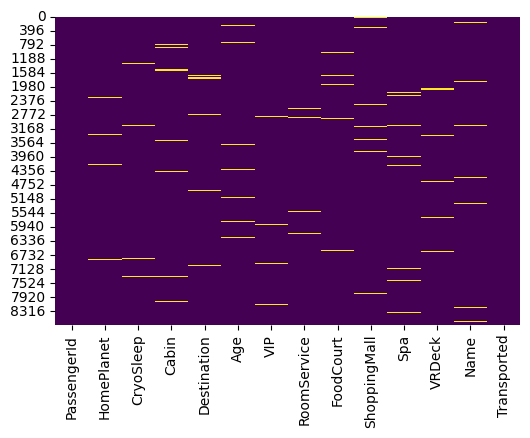

In [9]:
missing_values = data_train.isna()
plt.figure(figsize=(6, 4))
sns.heatmap(data_train.isna(), cbar = False, cmap='viridis')
plt.show()

In [10]:
data_train = data_train.dropna()

We do not see any distribution or pattern of missing values we can just delete it and the number of passengers who got missing values are pretty small.

## Few word about the logistic regression :

We want to find a way to predict which passenger as been transported. Our target variables only got 2 values possibles False and True (0 and 1). Our features are quantitatives and qualitatives. We want to apply this method to see if we can find anything interesting (a pattern, a modality that is more important than the other etc).

We are going to create our target variable and the our features

### For this part only we are going to use only the data_train and divide it again, because data_test don't provide the target variable. We are going to devide the data_train set into 2 dataset one data_train and one data_test but this time we are going to have the y_test that we are going to use.


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train.drop("Transported", axis=1), data_train["Transported"], test_size=1/3, random_state=0)

### Graphic, plot, histogram 

Let's have a representation of our dataset

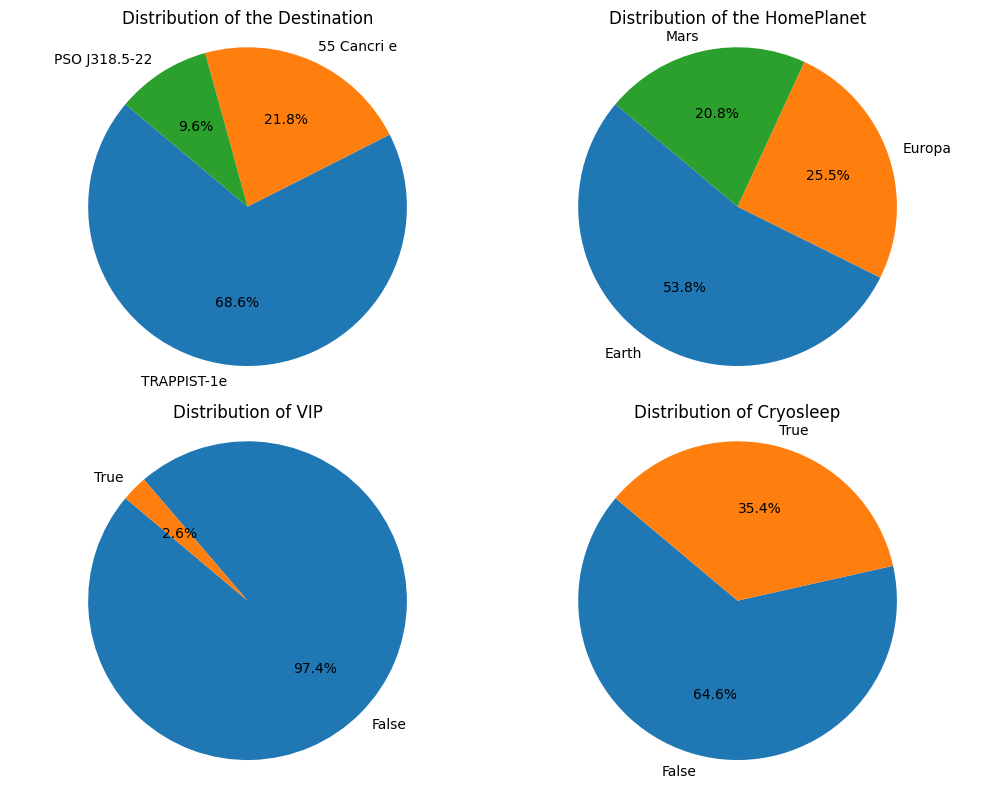

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

destination = X_train['Destination'].value_counts()
axes[0, 0].pie(destination, labels=destination.index, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('Distribution of the Destination')
axes[0, 0].axis('equal')

homeplanet = X_train['HomePlanet'].value_counts()
axes[0, 1].pie(homeplanet, labels=homeplanet.index, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Distribution of the HomePlanet')
axes[0, 1].axis('equal')

VIP = X_train["VIP"].value_counts()
axes[1, 0].pie(VIP, labels=VIP.index, autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('Distribution of VIP')
axes[1, 0].axis('equal')


cryosleep = X_train["CryoSleep"].value_counts()
axes[1, 1].pie(cryosleep, labels=cryosleep.index, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('Distribution of Cryosleep')
axes[1, 1].axis('equal')

plt.tight_layout()
plt.show()


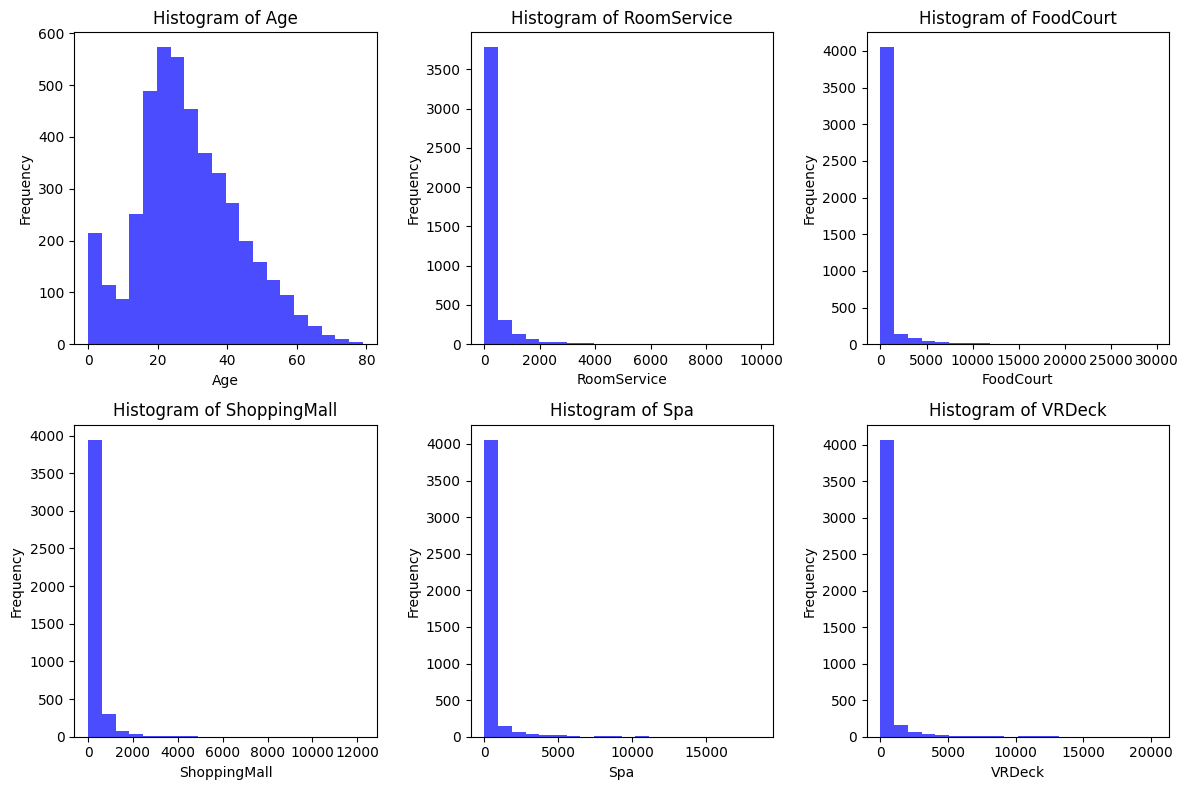

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

variables = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    data = X_train[var]
    ax = axes[row, col]
    ax.hist(data, bins=20, color='blue', alpha=0.7)
    ax.set_title(f'Histogram of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

In [15]:
X_train['HomePlanet'] = X_train['HomePlanet'].astype(str)
X_train['Destination'] = pd.factorize(X_train['Destination'])[0]
X_train['VIP'] = X_train['VIP'].astype(str)
X_train['CryoSleep'] = X_train['CryoSleep'].astype(str)
convert = ['HomePlanet','Destination','VIP','CryoSleep']
X_train = pd.get_dummies(X_train, columns=convert, prefix=convert)
X_train.drop(["Cabin","PassengerId","Name"],axis=1,inplace=True)

<AxesSubplot: >

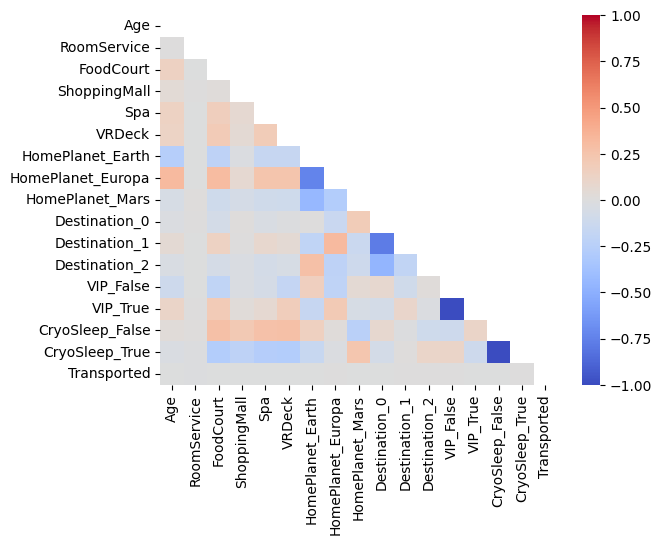

In [16]:
df_merged = pd.merge(X_train, data_train[["RoomService","Transported"]], on='RoomService', how='left')
upp_mat = np.triu(df_merged.corr())
sns.heatmap(df_merged.corr(), vmin=-1, vmax=+1, annot=False, cmap="coolwarm", mask=upp_mat)

We can see that there is more individuals going to "TRAPPIST-1e", more individuals coming from earth, not being VIP and doing cryo. Unfortunatly there is no significant features that is in correlation with another. To be sure if there is a feature more important than other we are going to use a logistic regression.

We want to use the logistic regression from the scikit-learn library. We can not let the objet variable and we need to change to a categorical variable. (We are also drop variable that we do not need)

In [17]:
print(X_train.dtypes)
print(X_train.head())

Age                  float64
RoomService          float64
FoodCourt            float64
ShoppingMall         float64
Spa                  float64
VRDeck               float64
HomePlanet_Earth        bool
HomePlanet_Europa       bool
HomePlanet_Mars         bool
Destination_0           bool
Destination_1           bool
Destination_2           bool
VIP_False               bool
VIP_True                bool
CryoSleep_False         bool
CryoSleep_True          bool
dtype: object
       Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck   
1528  35.0          0.0        0.0           0.0     0.0     0.0  \
357   48.0          0.0      111.0           0.0  1508.0     0.0   
1101  17.0          0.0        0.0           0.0     0.0     0.0   
4688  30.0       1120.0        0.0           0.0     0.0   794.0   
6415  24.0          1.0        0.0           0.0   691.0     0.0   

      HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  Destination_0   
1528             False              

## Logistic Regression

In [18]:
modele_logit = LogisticRegression(penalty='none',solver='newton-cg')
modele_logit.fit(X_train,y_train)
pd.DataFrame(np.concatenate([modele_logit.intercept_.reshape(-1,1),
                             modele_logit.coef_],axis=1),index = ["coef"],
             columns = ["constante"]+list(X_train.columns)).T

C:\Users\vvicn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


,coef
constante,0.471800
Age,-0.008423
RoomService,-0.001413
FoodCourt,0.000487
ShoppingMall,0.000628
Spa,-0.002002
VRDeck,-0.001923
HomePlanet_Earth,-0.835272
HomePlanet_Europa,1.482388
HomePlanet_Mars,-0.175317


## Interpretation

The coefficients mean that if a value is low it interfer not that much, in the other hand if it's high it does interfer. Futhermore if it's positive it's increasing the probability that the passenger is missing. We see that Destination_2 which is 55-Cranri is influential for the probability of missing the same with Cryosleep_True and HomePlanet_Europa which seem logical according to the problem and the context. We can also had that if you come from Earth that avoid the passenger from missing a little more.

In [19]:
X_test['HomePlanet'] = X_test['HomePlanet'].astype(str)
X_test['Destination'] = pd.factorize(X_test['Destination'])[0]
X_test['VIP'] = X_test['VIP'].astype(str)
X_test['CryoSleep'] = X_test['CryoSleep'].astype(str)
convert = ['HomePlanet','Destination','VIP','CryoSleep']
X_test = pd.get_dummies(X_test, columns=convert, prefix=convert)
X_test.drop(["Cabin","PassengerId","Name"],axis=1,inplace=True)
print(X_test.dtypes)

Age                  float64
RoomService          float64
FoodCourt            float64
ShoppingMall         float64
Spa                  float64
VRDeck               float64
HomePlanet_Earth        bool
HomePlanet_Europa       bool
HomePlanet_Mars         bool
Destination_0           bool
Destination_1           bool
Destination_2           bool
VIP_False               bool
VIP_True                bool
CryoSleep_False         bool
CryoSleep_True          bool
dtype: object


## Limit of the model

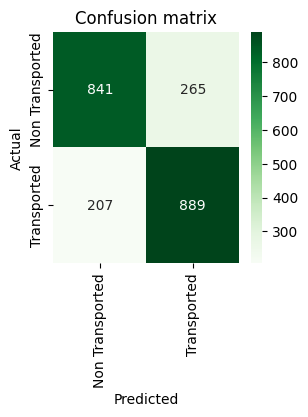

In [20]:
from sklearn.metrics import confusion_matrix

y_pred = modele_logit.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Greens', xticklabels=['Non Transported', 'Transported'], yticklabels=['Non Transported', 'Transported'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [21]:
TP = confusion[0][0]  
FP = confusion[0][1] 
FN = confusion[1][0]
TN = confusion[1][1]
precision = TP/(TP + FP)
recall = TP/(TP+FN)
print("The accuracy is ",precision)
print("The recall is ",recall)
print("The F1_score is ",2*(precision*recall)/(precision+recall))

The accuracy is  0.7603978300180831
The recall is  0.8024809160305344
The F1_score is  0.7808727948003714


The interpreation of those values show that the precision of good prediction is about 76.8%, the recall 79.7% which is pretty good in our case because that mean we don't reject the one who has been truly transported. The $F_{1}-score$ is the harmonic mean that show a good balance between the fact that we don't want to consider the one who has been transported non-transporter and the one who has not been transported as transported. 

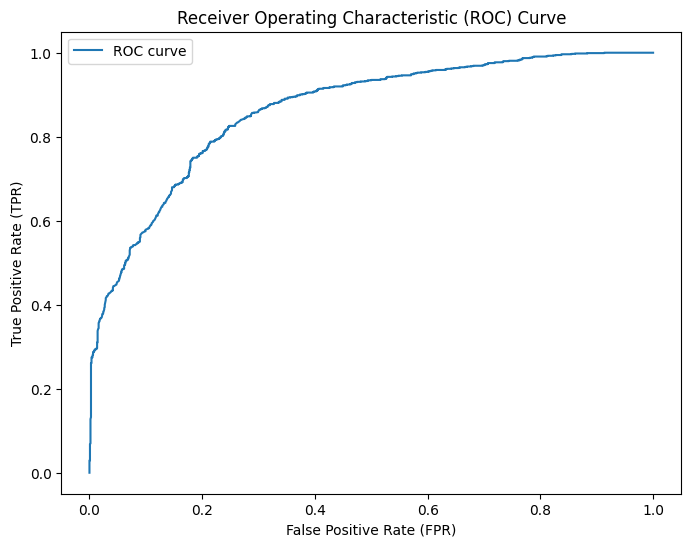

AUC-ROC: 0.863104450178852


In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = modele_logit.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC is close to 1 we can say that the model is pretty good

In [23]:
import statsmodels.api as sm

col = ['HomePlanet_Earth',
'HomePlanet_Europa',
'HomePlanet_Mars',
'Destination_0',
'Destination_1',
'Destination_2',
'VIP_False',
'VIP_True',
'CryoSleep_False',
'CryoSleep_True' ]

for i in col:
    X_train[i] = X_train[i].astype(int)


In [24]:
import statsmodels.api as sm

model = sm.Logit(y_train, X_train)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.433557
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            Transported   No. Observations:                 4404
Model:                          Logit   Df Residuals:                     4391
Method:                           MLE   Df Model:                           12
Date:                Fri, 17 Nov 2023   Pseudo R-squ.:                  0.3744
Time:                        01:18:05   Log-Likelihood:                -1909.4
converged:                       True   LL-Null:                       -3052.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Age                  -0.0084      0.003     -3.008      0.003      -0.014      -0.003
RoomSer

#### Nevertheless we see that the Log-Likelihood and the Pseudo R_square is low, the model is most likely not fitted to be used in this circumstance, which is predicting who is transported or not. Thoses variables are maybe not good enough to explain our target variables. 

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree

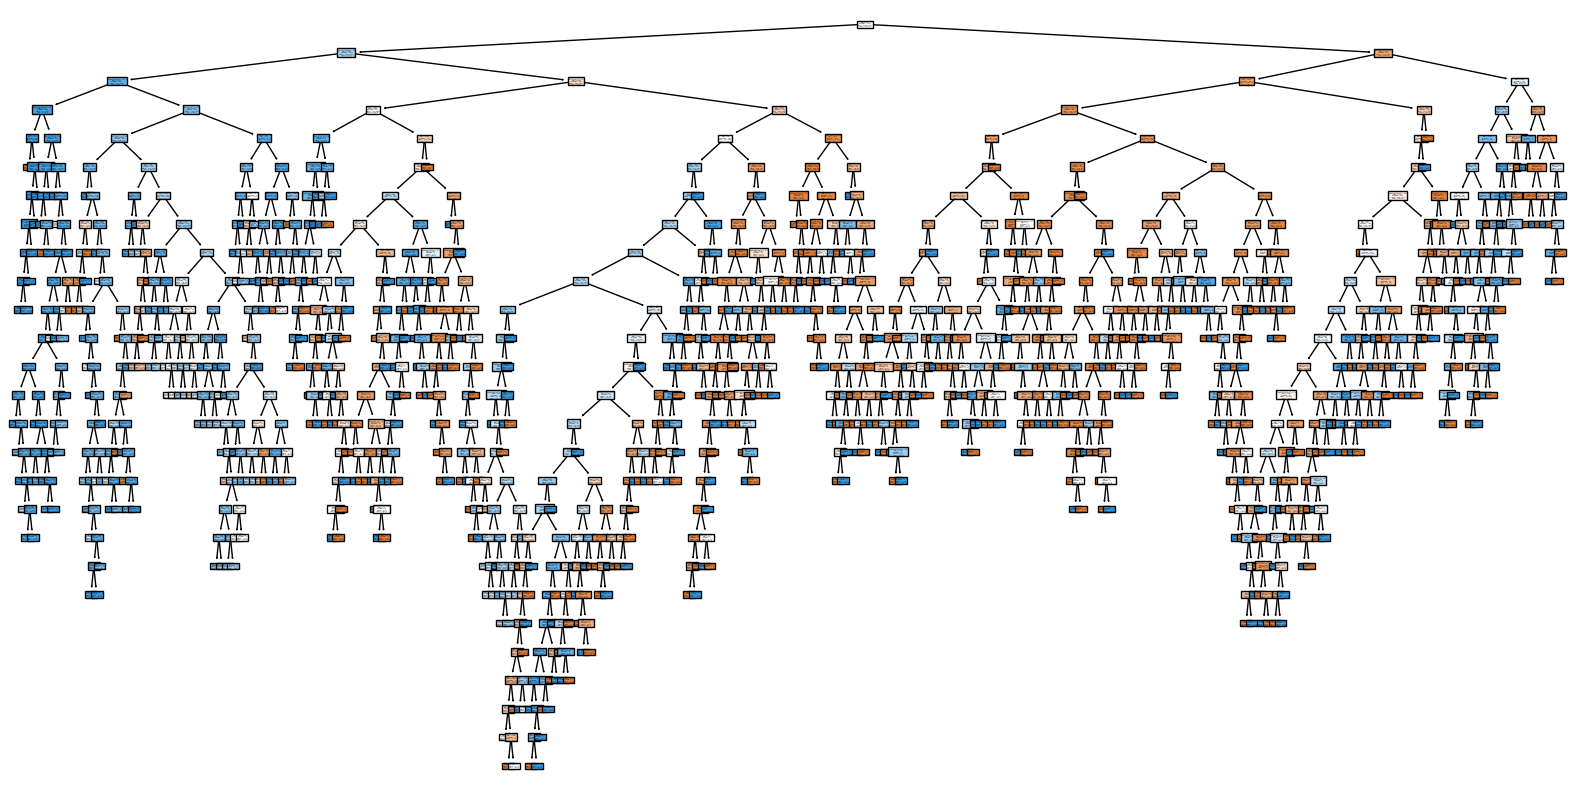

In [26]:
import matplotlib.pyplot as plt

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

tree_to_plot = model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'])
plt.show()

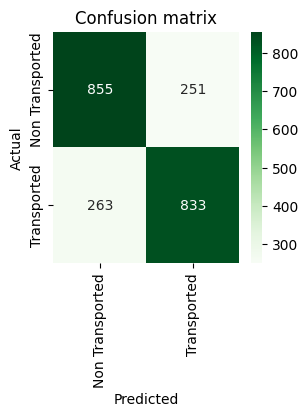

In [27]:
y_pred = model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Greens', xticklabels=['Non Transported', 'Transported'], yticklabels=['Non Transported', 'Transported'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [28]:
TP = confusion[0][0]  
FP = confusion[0][1] 
FN = confusion[1][0]
TN = confusion[1][1]
precision = TP/(TP + FP)
recall = TP/(TP+FN)
print("The accuracy is ",precision)
print("The recall is ",recall)
print("The F1_score is ",2*(precision*recall)/(precision+recall))

The accuracy is  0.7730560578661845
The recall is  0.7647584973166368
The F1_score is  0.768884892086331


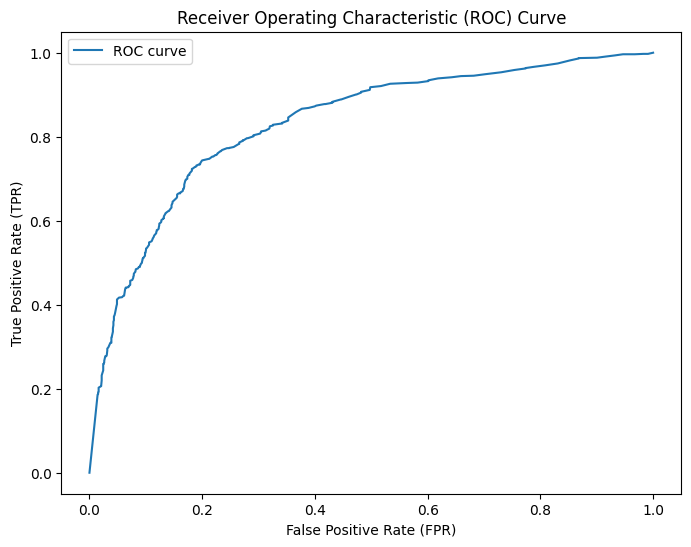

AUC-ROC: 0.8302577348503848


In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc_roc}')

## Comparative

In [30]:
data = {
    'Metric': ['accuracy', 'recall', 'F1-Score', 'AUC-ROC'],
    'Logistic regression': ['77%', '76,5%', '77%', '86%'],
    'Random Forest': ['77%', '76,5%', '76,9%', '83%']
}

tableau_recap = pd.DataFrame(data)

print(tableau_recap.to_string(index=False))

  Metric Logistic regression Random Forest
accuracy                 77%           77%
  recall               76,5%         76,5%
F1-Score                 77%         76,9%
 AUC-ROC                 86%           83%


In [31]:
import time

import numpy as np

start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.013 seconds


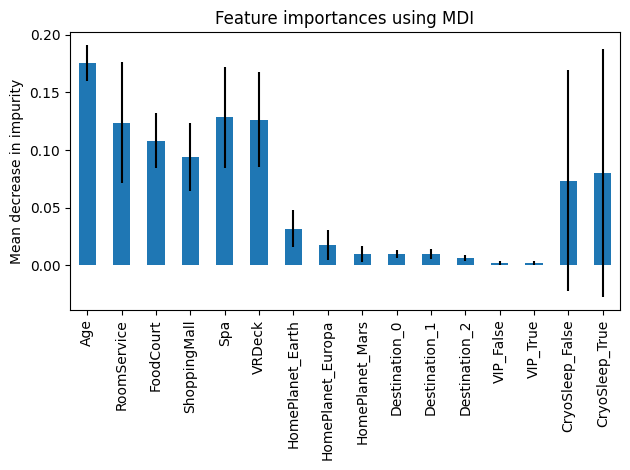

In [32]:
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [33]:
X_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_0,Destination_1,Destination_2,VIP_False,VIP_True,CryoSleep_False,CryoSleep_True
1528,35.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,1,0,0,1
357,48.0,0.0,111.0,0.0,1508.0,0.0,1,0,0,1,0,0,1,0,1,0
1101,17.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,1,0,0,1
4688,30.0,1120.0,0.0,0.0,0.0,794.0,1,0,0,1,0,0,1,0,1,0
6415,24.0,1.0,0.0,0.0,691.0,0.0,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,53.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,1,0,1,0
4317,36.0,0.0,0.0,0.0,725.0,2.0,1,0,0,0,1,0,1,0,1,0
2214,36.0,0.0,4756.0,0.0,7818.0,96.0,0,1,0,1,0,0,1,0,1,0
3468,34.0,0.0,4.0,0.0,685.0,1779.0,0,1,0,1,0,0,0,1,1,0


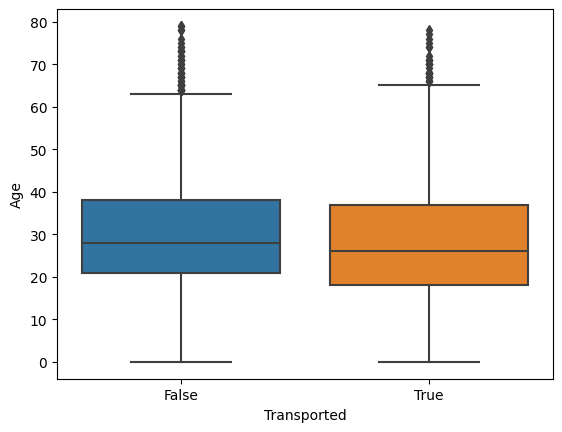

Test t : t-statistic = 6.73163661796557, p-value = 1.818775134813902e-11
Test de Mann-Whitney : U-statistic = 5965926.0, p-value = 4.1285598462864007e-11


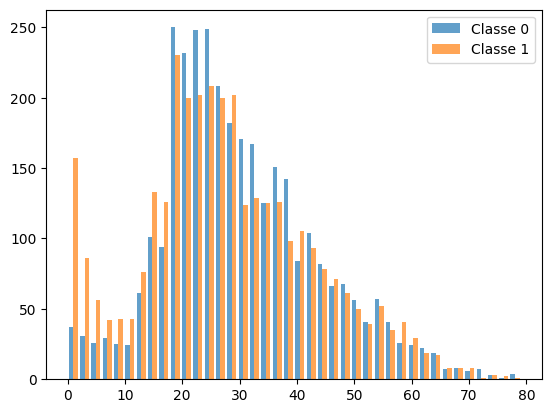

In [42]:
sns.boxplot(x='Transported', y='Age', data=data_train)
plt.show()

from scipy.stats import ttest_ind, mannwhitneyu

group_0 = data_train[data_train['Transported'] == 0]['Age']
group_1 = data_train[data_train['Transported'] == 1]['Age']

t_stat, p_value_t = ttest_ind(group_0, group_1)
mwu_stat, p_value_mw = mannwhitneyu(group_0, group_1)

print(f"Test t : t-statistic = {t_stat}, p-value = {p_value_t}")
print(f"Test de Mann-Whitney : U-statistic = {mwu_stat}, p-value = {p_value_mw}")

plt.hist([group_0, group_1], bins='auto', alpha=0.7, label=['Classe 0', 'Classe 1'])
plt.legend()
plt.show()



## Interpretation

Globaly the precision is very similar, we can even say that a logistic regression is maybe better nevertheless we saw before that the regression model is not that pertinent for this problem. But we can find all the transported passenger pretty much.